# Loading helper function and data set

In [4]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-11-29 21:10:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-29 21:10:28 (91.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



data set link : 
https://drive.google.com/file/d/1R03chBysLkWwIojbu5KX1uWgPzovXbUC/view

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
unzip_data('/content/drive/MyDrive/Graduation_Project2023/Test3/Eye data.zip')

# Packages

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

In [6]:
walk_through_dir('New folder')

There are 2 directories and 0 images in 'New folder'.
There are 0 directories and 41946 images in 'New folder/Close eyes'.
There are 0 directories and 42952 images in 'New folder/Open eyes'.


# Visualizing some random images

In [7]:
def view_randomimages(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (70, 70)


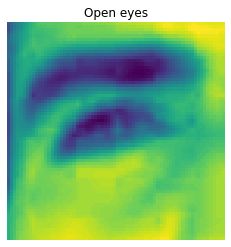

In [8]:
img = view_randomimages(target_dir = 'New folder/',
                        target_class = 'Open eyes')

Image shape: (80, 80)


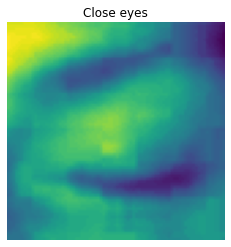

In [9]:
img = view_randomimages(target_dir = 'New folder/',
                        target_class = 'Close eyes')

# Prepare Data

In [10]:
train_dir = 'New folder'

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   zoom_range= 0.1,
                                   shear_range= 0.1,
                                   horizontal_flip = True,
                                   rotation_range = 20,
                                   fill_mode = 'nearest',
                                   validation_split = 0.3)
train_data_generator = train_datagen.flow_from_directory(train_dir,
                                                         batch_size= 32,
                                                         class_mode = 'binary',
                                                         seed = 42,
                                                         subset = 'training',
                                                         target_size = (224, 224))
validation_data_generator = train_datagen.flow_from_directory(train_dir,
                                                              batch_size = 32,
                                                              class_mode = 'binary',
                                                              seed = 42,
                                                              subset = 'validation',
                                                              target_size = (224,224),
                                                              shuffle = False)

Found 59430 images belonging to 2 classes.
Found 25468 images belonging to 2 classes.


# Model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              # optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              optimizer='adam',
              metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

# Training 

In [15]:
callbacks = myCallback()

history = model.fit(train_data_generator,
                    verbose = 1,
                    epochs = 20,
                    validation_data = validation_data_generator,
                    callbacks = callbacks)

Epoch 1/20
1858/1858 [==============================] - 853s 454ms/step - loss: 0.2128 - accuracy: 0.9186 - val_loss: 0.2781 - val_accuracy: 0.8741
Epoch 2/20
1858/1858 [==============================] - 842s 453ms/step - loss: 0.1089 - accuracy: 0.9629 - val_loss: 0.2639 - val_accuracy: 0.8929
Epoch 3/20
1858/1858 [==============================] - 837s 451ms/step - loss: 0.0816 - accuracy: 0.9725 - val_loss: 0.3965 - val_accuracy: 0.8837
Epoch 4/20
1858/1858 [==============================] - 842s 453ms/step - loss: 0.0677 - accuracy: 0.9769 - val_loss: 0.3028 - val_accuracy: 0.9008
Epoch 5/20
1858/1858 [==============================] - 847s 456ms/step - loss: 0.0624 - accuracy: 0.9795 - val_loss: 0.2830 - val_accuracy: 0.9035
Epoch 6/20
1858/1858 [==============================] - 845s 455ms/step - loss: 0.0555 - accuracy: 0.9813 - val_loss: 0.3180 - val_accuracy: 0.8940
Epoch 7/20
1858/1858 [==============================] - 838s 451ms/step - loss: 0.0535 - accuracy: 0.9817 - val_

In [16]:
val,los=model.evaluate(validation_data_generator)

796/796 [==============================] - 250s 314ms/step - loss: 0.2656 - accuracy: 0.9334


In [17]:
model.save('eyes_final.h5')

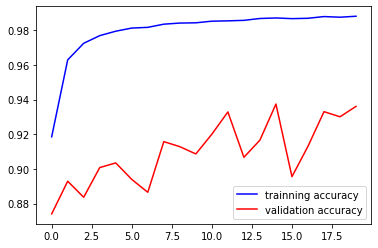

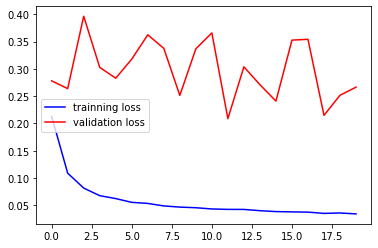

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Loading model and prediction

In [19]:
model = tf.keras.models.load_model('/content/eyes_final.h5')

In [20]:
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [21]:
def pred_and_plot(model, filename):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred=pred.round()
  if pred==0:
    pred_class="Open eyes"
  else:
    pred_class="Close eyes"  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 15ms/step


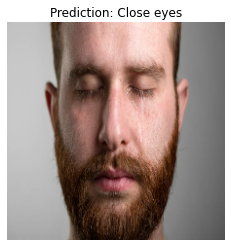

In [30]:
pred_and_plot(model, "/content/drive/MyDrive/Graduation_Project2023/test2/istockphoto-655818372-612x612.jpg")

# The link below is for opencv realtime detection

link to real time detection : https://github.com/akshaybahadur21/Drowsiness_Detection